In [1]:
import torch
from torch import nn
import torchvision
from torch.utils.data import Subset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import cnn
import numpy as np
from datetime import datetime
import os 

%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
seed = 1

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

batch_size = 8

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

val_idx = [i for i in range(7000)]
test_idx = [i for i in range(10_000)]

valset = torch.utils.data.Subset(testset, val_idx)
testset = torch.utils.data.Subset(testset, test_idx)


valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


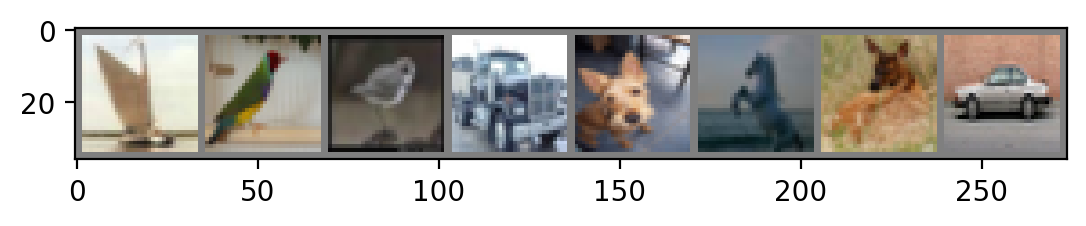

ship  bird  bird  truck dog   horse deer  car  


In [3]:

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
vgg = cnn.VGG(in_channels=3)
vgg.to(device)
criterion = nn.CrossEntropyLoss()
lr = 1e-3
epochs = 50
momentum = 0.9
optimizer = torch.optim.SGD(params=vgg.parameters(), momentum=momentum, lr=lr)
trainer = cnn.Trainer(model=vgg, train_dataloader=trainloader, val_dataloader=valloader, criterion=criterion, optimizer=optimizer, device=device, log_dir="check_overfits_small_train/")

path = 'models/vanilla_vgg_no_reg/lr_' + str(lr) + '_bs_' + str(batch_size) + '_m_' + str(momentum) + '_n_epoch_' + str(epochs) + '_' + str(datetime.now()).replace(' ', '_').replace(':', '_').replace('.', '-')[:16]

train_loss_list, train_acc_list, val_loss_list, val_acc_list = trainer.train(epochs=epochs)

path += '_' + str(max(val_acc_list))[:5]
model_path = path + '_model.pth'
train_loss_path = path + '_train_loss.npy'
val_loss_path = path + '_val_loss.npy'
train_acc_path = path + '_train_acc.npy'
val_acc_path = path + '_val_acc.npy'

train_loss_list = np.array(train_loss_list)
train_acc_list = np.array(train_acc_list)
val_loss_list = np.array(val_loss_list)
val_acc_list = np.array(val_acc_list)

# Save all the model's output and the model

torch.save(vgg, model_path)

with open(train_loss_path, 'wb') as f:
    np.save(f, train_loss_list)

with open(val_loss_path, 'wb') as f:
    np.save(f, val_loss_list)

with open(train_acc_path, 'wb') as f:
    np.save(f, train_acc_list)

with open(val_acc_path, 'wb') as f:
    np.save(f, val_acc_list)

  0%|          | 0/50 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
  2%|▏         | 1/50 [00:50<41:21, 50.65s/it]

Epoch 1/50: Train Loss = 2.3026, Train Accuracy = 0.1001, Val Loss = 2.3026, Val Accuracy = 0.0984


  4%|▍         | 2/50 [01:37<38:37, 48.29s/it]

Epoch 2/50: Train Loss = 2.3026, Train Accuracy = 0.1016, Val Loss = 2.3026, Val Accuracy = 0.0984


  6%|▌         | 3/50 [02:27<38:24, 49.03s/it]

Epoch 3/50: Train Loss = 2.3026, Train Accuracy = 0.1053, Val Loss = 2.3026, Val Accuracy = 0.0984


  8%|▊         | 4/50 [03:17<37:50, 49.36s/it]

Epoch 4/50: Train Loss = 2.3025, Train Accuracy = 0.1126, Val Loss = 2.3025, Val Accuracy = 0.0986


 10%|█         | 5/50 [04:07<37:22, 49.83s/it]

Epoch 5/50: Train Loss = 2.3024, Train Accuracy = 0.1217, Val Loss = 2.3024, Val Accuracy = 0.1281


 12%|█▏        | 6/50 [04:57<36:29, 49.77s/it]

Epoch 6/50: Train Loss = 2.3021, Train Accuracy = 0.1297, Val Loss = 2.3013, Val Accuracy = 0.1371


 14%|█▍        | 7/50 [05:48<36:03, 50.31s/it]

Epoch 7/50: Train Loss = 2.2439, Train Accuracy = 0.2152, Val Loss = 2.1678, Val Accuracy = 0.2893


 16%|█▌        | 8/50 [06:35<34:18, 49.01s/it]

Epoch 8/50: Train Loss = 2.1528, Train Accuracy = 0.2985, Val Loss = 2.1180, Val Accuracy = 0.3367


 18%|█▊        | 9/50 [07:25<33:43, 49.36s/it]

Epoch 9/50: Train Loss = 2.1072, Train Accuracy = 0.3487, Val Loss = 2.0746, Val Accuracy = 0.3770


 20%|██        | 10/50 [08:16<33:21, 50.04s/it]

Epoch 10/50: Train Loss = 2.0709, Train Accuracy = 0.3847, Val Loss = 2.0618, Val Accuracy = 0.3944


 22%|██▏       | 11/50 [09:07<32:35, 50.15s/it]

Epoch 11/50: Train Loss = 2.0435, Train Accuracy = 0.4135, Val Loss = 2.0223, Val Accuracy = 0.4341


 24%|██▍       | 12/50 [09:57<31:46, 50.17s/it]

Epoch 12/50: Train Loss = 2.0153, Train Accuracy = 0.4414, Val Loss = 1.9984, Val Accuracy = 0.4589


 26%|██▌       | 13/50 [10:49<31:14, 50.67s/it]

Epoch 13/50: Train Loss = 1.9903, Train Accuracy = 0.4661, Val Loss = 1.9738, Val Accuracy = 0.4830


 28%|██▊       | 14/50 [11:35<29:38, 49.39s/it]

Epoch 14/50: Train Loss = 1.9660, Train Accuracy = 0.4913, Val Loss = 1.9587, Val Accuracy = 0.4960


 30%|███       | 15/50 [12:25<28:56, 49.62s/it]

Epoch 15/50: Train Loss = 1.9434, Train Accuracy = 0.5143, Val Loss = 1.9351, Val Accuracy = 0.5219


 32%|███▏      | 16/50 [13:15<28:12, 49.77s/it]

Epoch 16/50: Train Loss = 1.9226, Train Accuracy = 0.5350, Val Loss = 1.9233, Val Accuracy = 0.5306


 34%|███▍      | 17/50 [14:05<27:25, 49.87s/it]

Epoch 17/50: Train Loss = 1.9023, Train Accuracy = 0.5557, Val Loss = 1.9338, Val Accuracy = 0.5236


 36%|███▌      | 18/50 [14:56<26:39, 49.97s/it]

Epoch 18/50: Train Loss = 1.8810, Train Accuracy = 0.5773, Val Loss = 1.8921, Val Accuracy = 0.5631


 38%|███▊      | 19/50 [15:45<25:43, 49.80s/it]

Epoch 19/50: Train Loss = 1.8613, Train Accuracy = 0.5987, Val Loss = 1.8740, Val Accuracy = 0.5863


 40%|████      | 20/50 [16:32<24:28, 48.96s/it]

Epoch 20/50: Train Loss = 1.8464, Train Accuracy = 0.6125, Val Loss = 1.8560, Val Accuracy = 0.6044


 42%|████▏     | 21/50 [17:23<23:58, 49.59s/it]

Epoch 21/50: Train Loss = 1.8291, Train Accuracy = 0.6302, Val Loss = 1.8716, Val Accuracy = 0.5861


 44%|████▍     | 22/50 [18:14<23:22, 50.08s/it]

Epoch 22/50: Train Loss = 1.8143, Train Accuracy = 0.6450, Val Loss = 1.8329, Val Accuracy = 0.6281


 46%|████▌     | 23/50 [19:05<22:33, 50.13s/it]

Epoch 23/50: Train Loss = 1.7976, Train Accuracy = 0.6628, Val Loss = 1.8253, Val Accuracy = 0.6363


 48%|████▊     | 24/50 [19:55<21:42, 50.09s/it]

Epoch 24/50: Train Loss = 1.7855, Train Accuracy = 0.6748, Val Loss = 1.8394, Val Accuracy = 0.6163


 50%|█████     | 25/50 [20:41<20:25, 49.02s/it]

Epoch 25/50: Train Loss = 1.7694, Train Accuracy = 0.6914, Val Loss = 1.8021, Val Accuracy = 0.6563


 52%|█████▏    | 26/50 [21:29<19:30, 48.78s/it]

Epoch 26/50: Train Loss = 1.7551, Train Accuracy = 0.7051, Val Loss = 1.7983, Val Accuracy = 0.6587


 54%|█████▍    | 27/50 [22:18<18:41, 48.75s/it]

Epoch 27/50: Train Loss = 1.7466, Train Accuracy = 0.7138, Val Loss = 1.7984, Val Accuracy = 0.6586


 56%|█████▌    | 28/50 [23:08<18:03, 49.25s/it]

Epoch 28/50: Train Loss = 1.7364, Train Accuracy = 0.7242, Val Loss = 1.7890, Val Accuracy = 0.6704


 58%|█████▊    | 29/50 [23:57<17:12, 49.17s/it]

Epoch 29/50: Train Loss = 1.7233, Train Accuracy = 0.7366, Val Loss = 1.7857, Val Accuracy = 0.6726


 60%|██████    | 30/50 [24:47<16:27, 49.39s/it]

Epoch 30/50: Train Loss = 1.7169, Train Accuracy = 0.7433, Val Loss = 1.7803, Val Accuracy = 0.6776


 62%|██████▏   | 31/50 [25:33<15:19, 48.40s/it]

Epoch 31/50: Train Loss = 1.7111, Train Accuracy = 0.7491, Val Loss = 1.7827, Val Accuracy = 0.6747


 64%|██████▍   | 32/50 [26:24<14:41, 48.96s/it]

Epoch 32/50: Train Loss = 1.7003, Train Accuracy = 0.7606, Val Loss = 1.7925, Val Accuracy = 0.6663


 66%|██████▌   | 33/50 [27:13<13:52, 48.95s/it]

Epoch 33/50: Train Loss = 1.6986, Train Accuracy = 0.7624, Val Loss = 1.7676, Val Accuracy = 0.6911


 68%|██████▊   | 34/50 [28:02<13:04, 49.04s/it]

Epoch 34/50: Train Loss = 1.6918, Train Accuracy = 0.7687, Val Loss = 1.7666, Val Accuracy = 0.6939


 70%|███████   | 35/50 [28:51<12:14, 48.98s/it]

Epoch 35/50: Train Loss = 1.6822, Train Accuracy = 0.7783, Val Loss = 1.7679, Val Accuracy = 0.6923


 72%|███████▏  | 36/50 [29:37<11:15, 48.25s/it]

Epoch 36/50: Train Loss = 1.6751, Train Accuracy = 0.7850, Val Loss = 1.7631, Val Accuracy = 0.6959


 74%|███████▍  | 37/50 [30:26<10:29, 48.42s/it]

Epoch 37/50: Train Loss = 1.6742, Train Accuracy = 0.7856, Val Loss = 1.7606, Val Accuracy = 0.6991


 76%|███████▌  | 38/50 [31:15<09:43, 48.66s/it]

Epoch 38/50: Train Loss = 1.6681, Train Accuracy = 0.7925, Val Loss = 1.7498, Val Accuracy = 0.7093


 78%|███████▊  | 39/50 [32:05<08:57, 48.85s/it]

Epoch 39/50: Train Loss = 1.6690, Train Accuracy = 0.7911, Val Loss = 1.7633, Val Accuracy = 0.6970


 80%|████████  | 40/50 [32:54<08:09, 48.95s/it]

Epoch 40/50: Train Loss = 1.6626, Train Accuracy = 0.7979, Val Loss = 1.7534, Val Accuracy = 0.7071


 82%|████████▏ | 41/50 [33:39<07:10, 47.87s/it]

Epoch 41/50: Train Loss = 1.6664, Train Accuracy = 0.7938, Val Loss = 1.7491, Val Accuracy = 0.7110


 84%|████████▍ | 42/50 [34:28<06:24, 48.04s/it]

Epoch 42/50: Train Loss = 1.6641, Train Accuracy = 0.7962, Val Loss = 1.7728, Val Accuracy = 0.6869


 86%|████████▌ | 43/50 [35:18<05:40, 48.64s/it]

Epoch 43/50: Train Loss = 1.6614, Train Accuracy = 0.7990, Val Loss = 1.7592, Val Accuracy = 0.7010


 88%|████████▊ | 44/50 [36:08<04:55, 49.18s/it]

Epoch 44/50: Train Loss = 1.6710, Train Accuracy = 0.7895, Val Loss = 1.7984, Val Accuracy = 0.6614


 90%|█████████ | 45/50 [36:57<04:05, 49.13s/it]

Epoch 45/50: Train Loss = 1.6794, Train Accuracy = 0.7809, Val Loss = 1.7761, Val Accuracy = 0.6846


 92%|█████████▏| 46/50 [37:46<03:16, 49.21s/it]

Epoch 46/50: Train Loss = 1.6853, Train Accuracy = 0.7750, Val Loss = 1.7798, Val Accuracy = 0.6803


 94%|█████████▍| 47/50 [38:33<02:25, 48.39s/it]

Epoch 47/50: Train Loss = 1.7026, Train Accuracy = 0.7580, Val Loss = 1.7670, Val Accuracy = 0.6937


 96%|█████████▌| 48/50 [39:23<01:37, 48.78s/it]

Epoch 48/50: Train Loss = 1.7223, Train Accuracy = 0.7382, Val Loss = 1.8568, Val Accuracy = 0.6031


 98%|█████████▊| 49/50 [40:11<00:48, 48.76s/it]

Epoch 49/50: Train Loss = 1.7479, Train Accuracy = 0.7127, Val Loss = 1.9956, Val Accuracy = 0.4657


100%|██████████| 50/50 [41:02<00:00, 49.25s/it]

Epoch 50/50: Train Loss = 1.8464, Train Accuracy = 0.6143, Val Loss = 1.8938, Val Accuracy = 0.5663


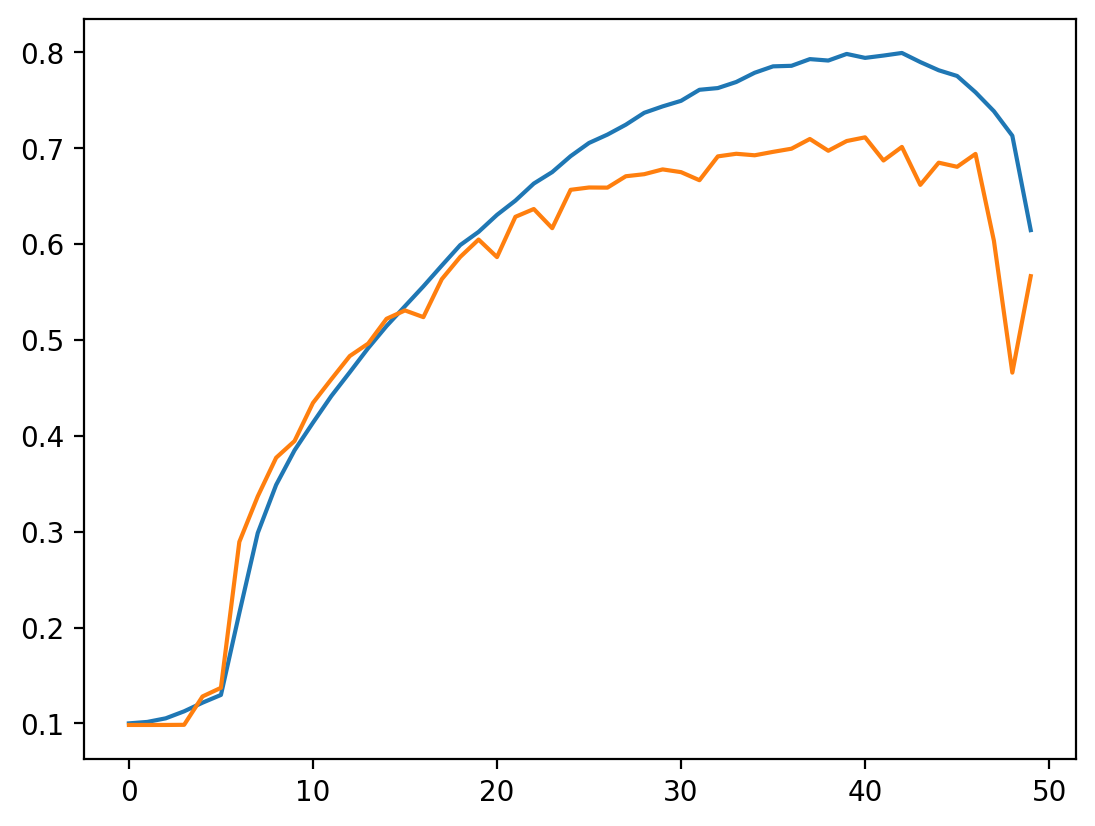

In [6]:
plt.plot(train_acc_list)
plt.plot(val_acc_list)

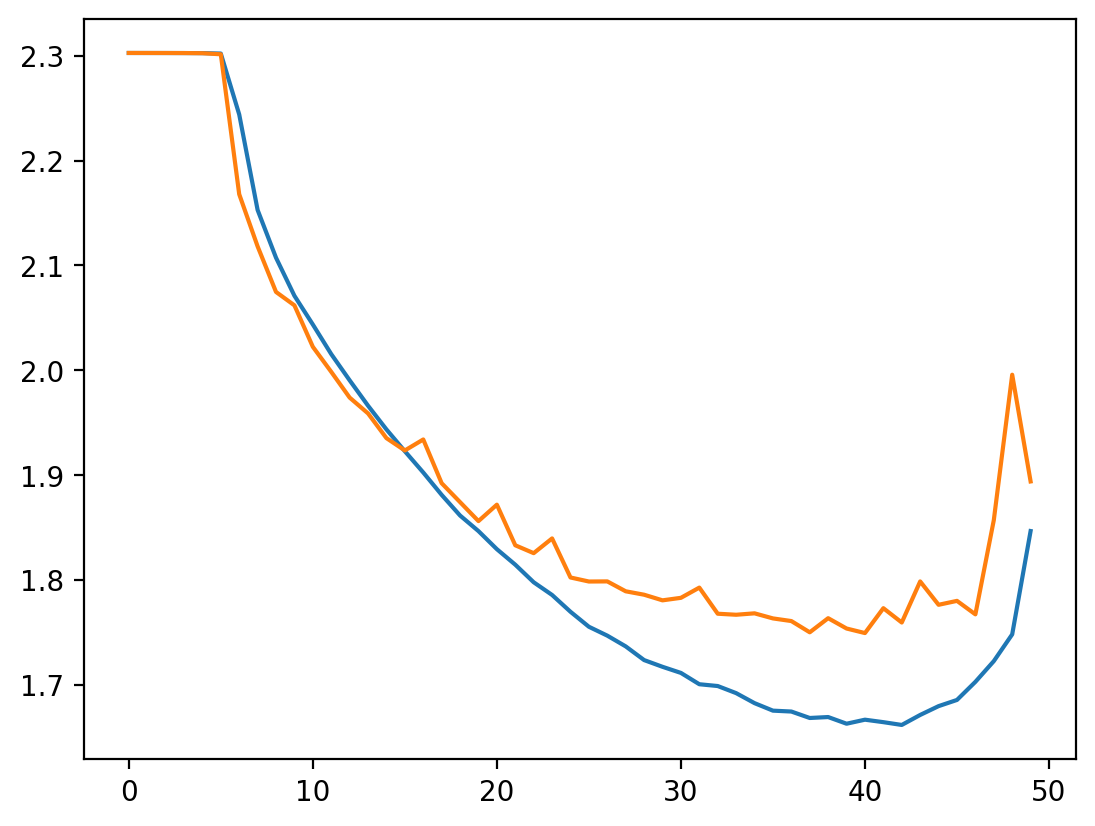

In [9]:
plt.plot(train_loss_list)
plt.plot(val_loss_list)

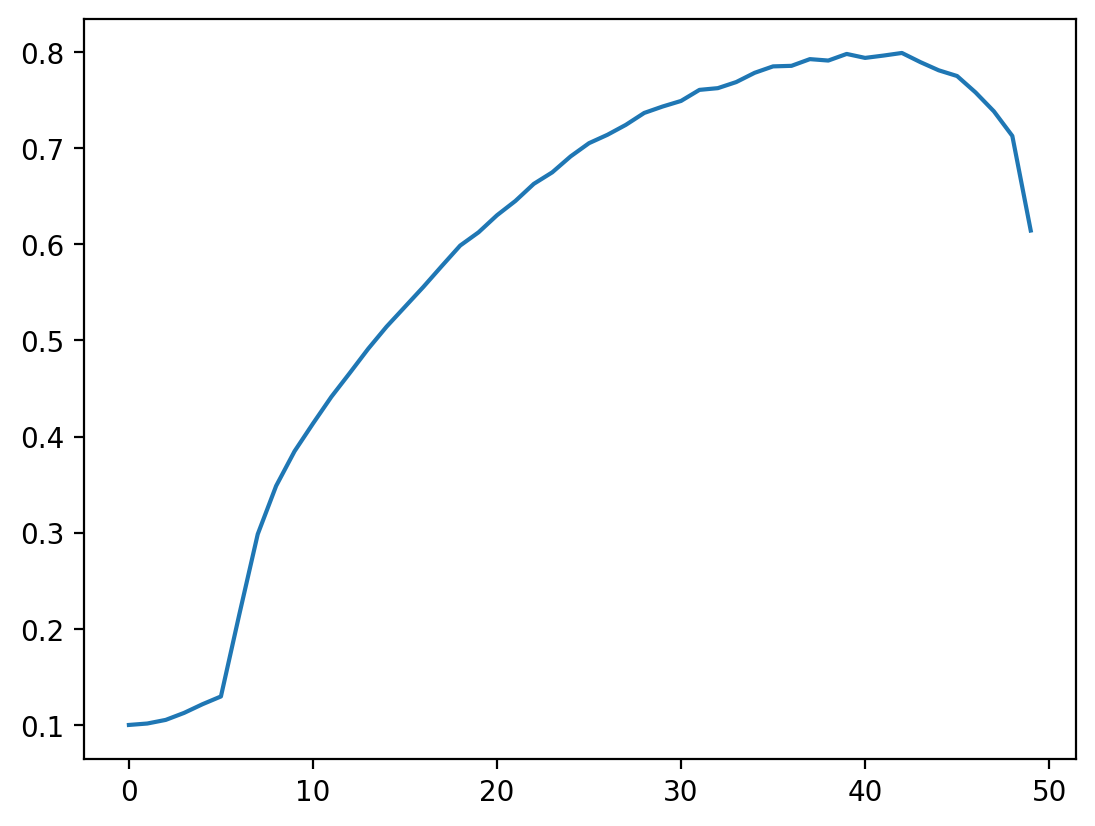

In [8]:
new_train_acc = np.load(train_acc_path)
plt.plot(new_train_acc)